In [6]:
import sys
import pandas as pd
import numpy as np
# !pip install keras
# !pip install tensorflow
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline



def is_venv():
    return (hasattr(sys, 'real_prefix') or
            (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix))

In [7]:
if is_venv():
    print('inside virtualenv or venv')
else:
    print('outside virtualenv or venv')

outside virtualenv or venv


In [8]:

# !python3 -m pip install requests

In [9]:
# import requests

# # The API endpoint
# #GET https://api.linkedin.com/rest/organizations/79988552
# url = "https://api.linkedin.com/rest/organizations/79988552"

# # A GET request to the API
# response = requests.get(url)

# # Print the response
# response_json = response.json()
# print(response_json)

In [10]:
# !pip install seaborn

In [11]:
df = pd.read_csv("nasdaq100/small/nasdaq100_padding.csv")

FileNotFoundError: ignored

In [ ]:
df.head()

In [ ]:
len(df['AAPL'])

In [ ]:
# filenames = open("nasdaq100/small/small_stock_name.txt","r")
# filenames.readlines()

In [ ]:
sns.lineplot(x=df.index, y='AAPL', data=df)

In [ ]:
# !pip install yfinance

In [12]:
import yfinance as yf

In [13]:
# data = yf.download("AERT", period="1mo")

In [14]:
# data

In [15]:
# msft = yf.Ticker("GOOGL")

# # get all stock info
# msft.info


In [16]:
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


In [17]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

KeyboardInterrupt: ignored

In [ ]:
# Summary Stats
AAPL.describe()

In [ ]:
GOOG.describe()

In [ ]:
GOOG.head()

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

# Price/Volume - If ratio is low, market is bullish

## In the findings below, we see the Microsoft stock is the more bearish and amazon is more bulllish

In [ ]:
plt.figure(figsize=(25, 20))

for i, company in enumerate(company_list, 1):
    plt.plot(company['Adj Close']/company['Volume'], label = {tech_list[i - 1]})
    plt.ylabel('Price/Volume of Shares')
    plt.xlabel(None)


plt.title(f"Price/Volume of Shares - Each Company")
plt.legend()
plt.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Analyzing AAPL stock

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [33]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

In [34]:
df = yf.download('GOOGL', start, end)


[*********************100%%**********************]  1 of 1 completed


In [35]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-12,27.016266,27.100601,26.751753,26.775776,26.775776,63796140
2013-12-13,26.911913,26.934183,26.473724,26.546295,26.546295,86409504
2013-12-16,26.626627,26.894144,26.576826,26.851351,26.851351,64015920
2013-12-17,26.847347,27.046045,26.736237,26.773273,26.773273,61366572
2013-12-18,26.823072,27.150902,26.502502,27.145897,27.145897,88323588


In [36]:
len(df)

2517

In [37]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

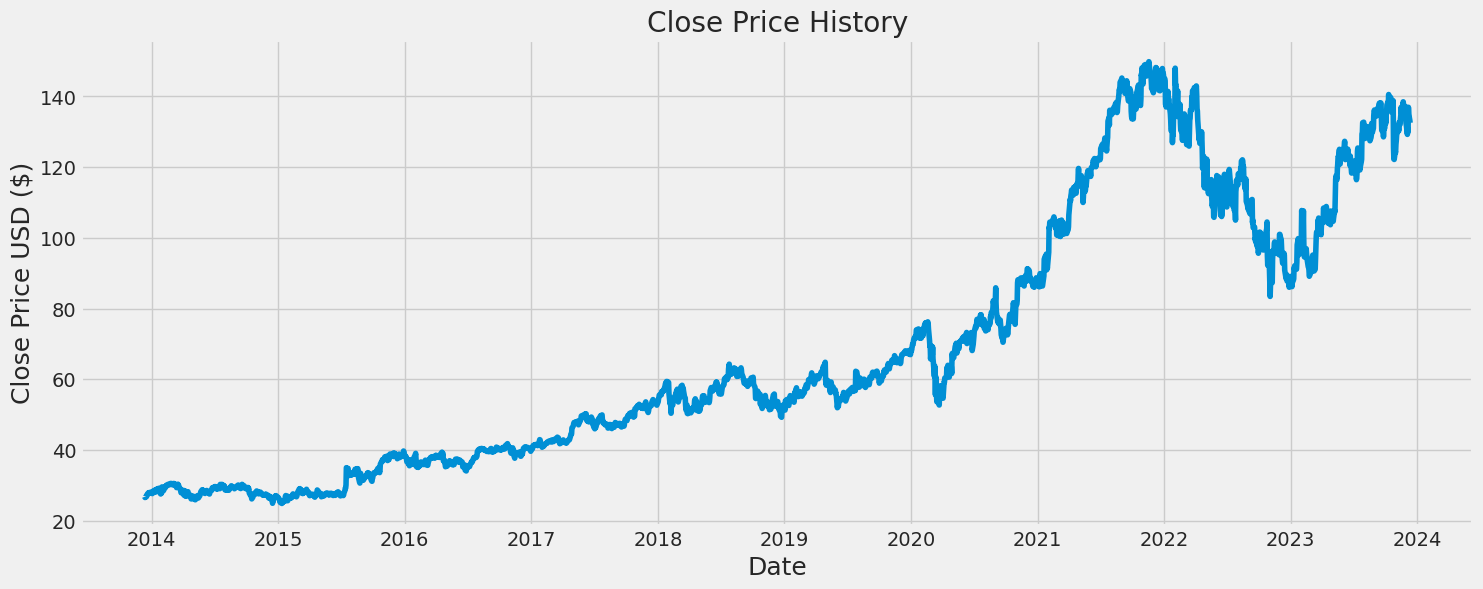

In [38]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

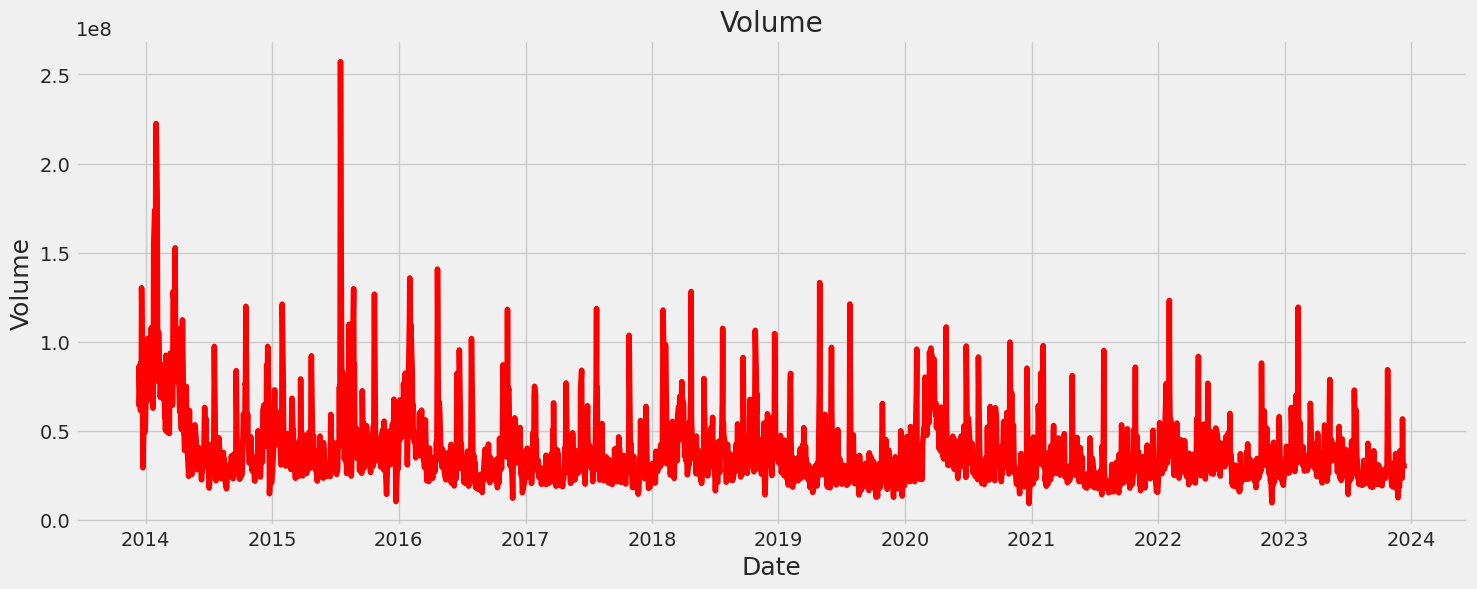

In [39]:
plt.figure(figsize=(16,6))
plt.title('Volume')
plt.plot(df['Volume'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

In [40]:
data = df.filter(['Close'])
# print(data)


# Convert the dataframe to a numpy array
closing_prices = data.values


# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(closing_prices) * .95 ))

training_data_len


2392

In [41]:
# Scale the data
# !pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_prices)

# scaled_data

In [42]:
train_data = scaled_data[0:int(training_data_len), :]
train_data.shape

(2392, 1)

In [43]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()



# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.01538399, 0.01354793, 0.01598866, 0.01536396, 0.0183453 ,
       0.01863963, 0.02152284, 0.02442207, 0.02376934, 0.0248946 ,
       0.0250828 , 0.0232928 , 0.02554532, 0.02402563, 0.02239982,
       0.02486656, 0.02917938, 0.02965391, 0.02745346, 0.02744145,
       0.02599984, 0.03128973, 0.03113356, 0.03265526, 0.03151598,
       0.03415293, 0.03441723, 0.03343213, 0.02617003, 0.02164497,
       0.02600584, 0.02278424, 0.0284846 , 0.03761079, 0.02809217,
       0.02903923, 0.03004835, 0.0334041 , 0.036904  , 0.036001  ,
       0.03945485, 0.03875607, 0.04140103, 0.04198166, 0.04359946,
       0.04188956, 0.04224396, 0.04217988, 0.04392584, 0.04542551,
       0.04545954, 0.04526734, 0.04455455, 0.04195964, 0.04440637,
       0.04507711, 0.04534742, 0.04438235, 0.04373763, 0.04141903])]
[0.04288267508080998]

[array([0.01538399, 0.01354793, 0.01598866, 0.01536396, 0.0183453 ,
       0.01863963, 0.02152284, 0.02442207, 0.02376934, 0.0248946 ,
       0.0250828 , 0.0232928 , 0.02

(2332, 60, 1)

In [44]:
x_train.shape

(2332, 60, 1)

In [45]:
# !pip install keras
# !pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 168s 70ms/step - loss: 0.0015


In [46]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = closing_prices[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 2s 71ms/step


4.196649321444489

<ipython-input-47-bac245597b66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


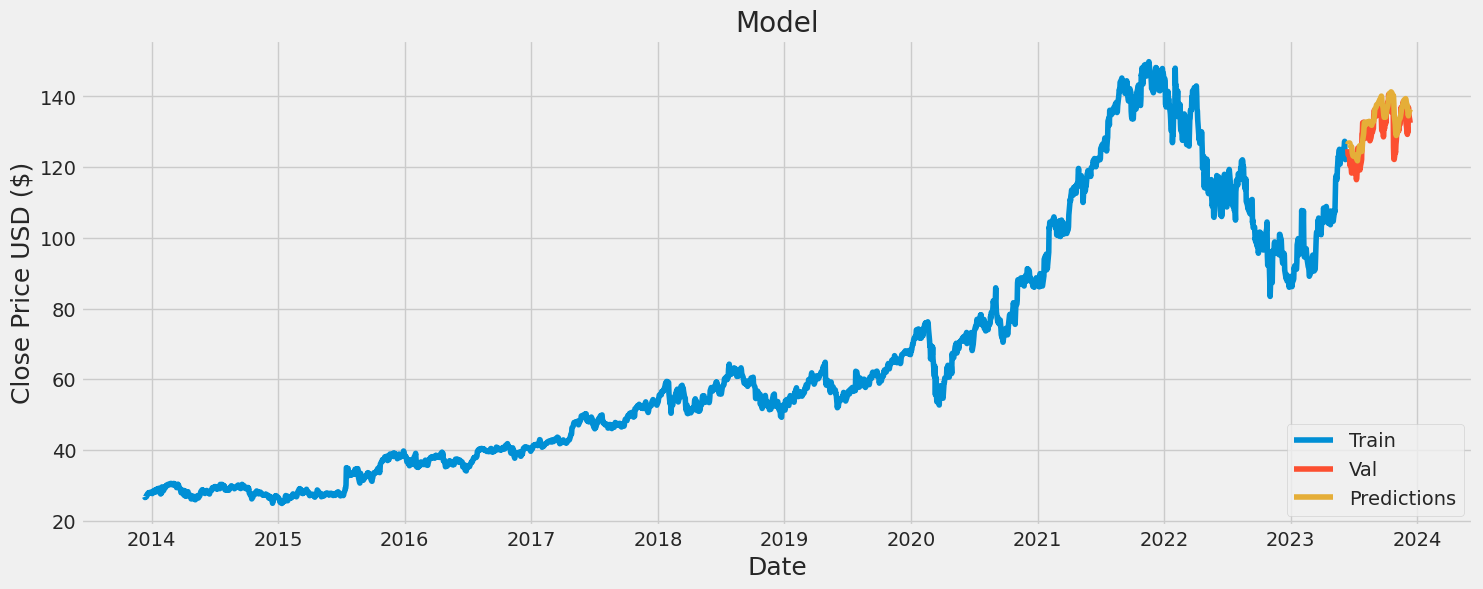

In [47]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [48]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-06-15,125.089996,126.433365
2023-06-16,123.529999,126.774055
2023-06-20,123.099998,126.855392
2023-06-21,120.550003,126.763252
2023-06-22,123.150002,126.156761
...,...,...
2023-12-06,130.020004,135.197281
2023-12-07,136.929993,134.505905
2023-12-08,134.990005,135.291061


from matplotlib import pyplot as plt
valid['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
valid['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
valid.plot(kind='scatter', x='Close', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
valid['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
valid['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

In [53]:
df2 = yf.download('CMG', start, end)

[*********************100%%**********************]  1 of 1 completed


In [54]:
len(df2)

2517

[array([0.12744436, 0.12639556, 0.12761835, 0.12629408, 0.12834815,
       0.1272317 , 0.13620196, 0.13518218, 0.13618745, 0.13730873,
       0.13504684, 0.1356703 , 0.13602798, 0.131509  , 0.13531749,
       0.13338908, 0.13616329, 0.13751171, 0.14001529, 0.13882634,
       0.13458769, 0.1348197 , 0.13577181, 0.13444754, 0.13352923,
       0.13254329, 0.12789384, 0.12185245, 0.11655052, 0.11501842,
       0.11625569, 0.11269369, 0.11726581, 0.14529788, 0.14106407,
       0.13980264, 0.14069191, 0.14167786, 0.14400742, 0.14342747,
       0.14186635, 0.14229167, 0.14804792, 0.14633698, 0.14573284,
       0.1454042 , 0.14448592, 0.14410409, 0.14646749, 0.14658348,
       0.14682513, 0.14973468, 0.15170176, 0.1465738 , 0.16118432,
       0.15945406, 0.16526347, 0.16533111, 0.16269709, 0.16091367])]
[0.16305473412573052]

[array([0.12744436, 0.12639556, 0.12761835, 0.12629408, 0.12834815,
       0.1272317 , 0.13620196, 0.13518218, 0.13618745, 0.13730873,
       0.13504684, 0.1356703 , 0.13

<ipython-input-55-975c327a69f0>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


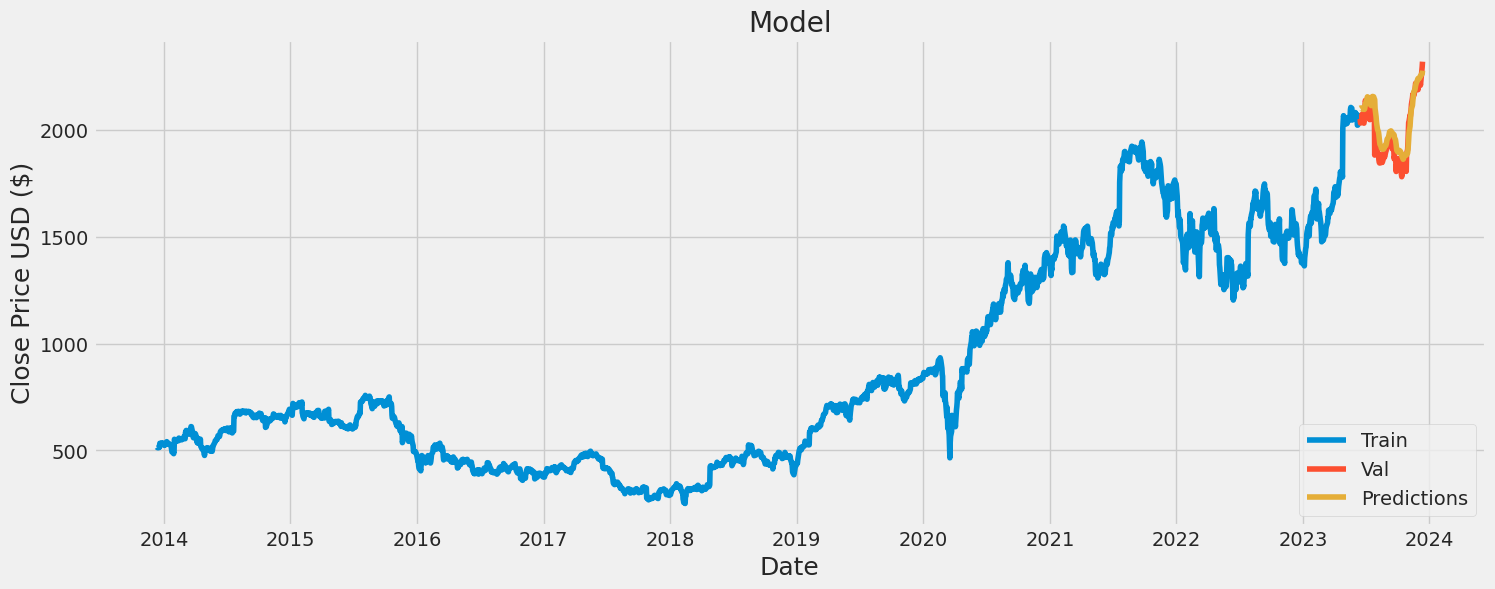

In [55]:
data = df2.filter(['Close'])
# print(data)


# Convert the dataframe to a numpy array
closing_prices = data.values


# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(closing_prices) * .95 ))

training_data_len


# Scale the data
# !pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_prices)

# scaled_data

train_data = scaled_data[0:int(training_data_len), :]
train_data.shape


x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()



# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = closing_prices[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse





train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()





In [56]:
valid

,Close,Predictions
Date,,
2023-06-15,2051.659912,2102.433350
2023-06-16,2032.920044,2103.358643
2023-06-20,2049.800049,2099.705078
2023-06-21,2074.479980,2098.313965
2023-06-22,2050.520020,2102.348145
...,...,...
2023-12-06,2210.050049,2254.586914
2023-12-07,2226.250000,2255.242432
2023-12-08,2242.949951,2257.669189
